In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../../DATA/mouse_viral_study.csv')

In [5]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


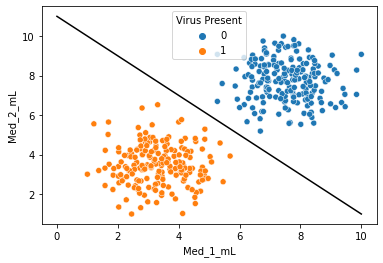

In [7]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', hue='Virus Present',data=df)

# HYPERPLANE
x = np.linspace(0, 10, 100)
m = -1
b = 11
y = m* x + b
plt.plot(x, y, 'black')

In [8]:
from sklearn.svm import SVC


In [9]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

In [10]:
y = df['Virus Present']

In [11]:
X = df.drop('Virus Present', axis = 1)

In [12]:
model = SVC(kernel='linear', C=1000)

In [13]:
model.fit(X, y)

SVC(C=1000, kernel='linear')

In [14]:
# THIS CODE IS DIRECTLY FROM THE DOCUMENTATION OF SKLEARN
def plot_svm_boundary(model,X,y):
    
    X = X.values
    y = y.values
    
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')

    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

C:\Users\Shreyash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


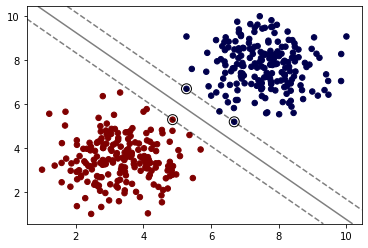

In [15]:
plot_svm_boundary(model, X, y)

### # Not the same C as we see in mathematical equations, actually inversely proportional to it


In [19]:
model = SVC(kernel='linear', C=0.005)
# Not the same C as we see in mathematical equations, actually inversely proportional to it
model.fit(X, y)

SVC(C=0.005, kernel='linear')

C:\Users\Shreyash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


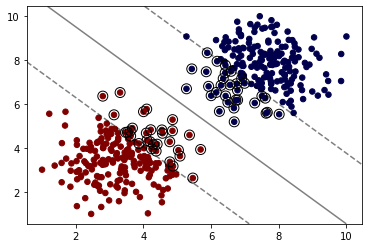

In [20]:
plot_svm_boundary(model, X, y)

C:\Users\Shreyash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


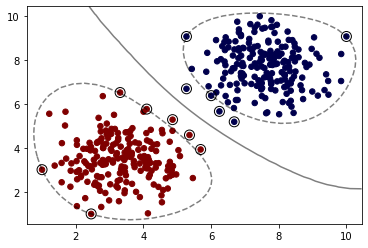

In [21]:
model = SVC(kernel='rbf',C=1)
model.fit(X, y)
plot_svm_boundary(model, X, y)

C:\Users\Shreyash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


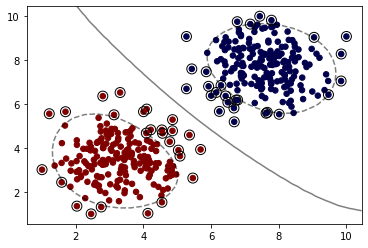

In [24]:
model = SVC(kernel='rbf',C=0.1)
model.fit(X, y)
plot_svm_boundary(model, X, y)

C:\Users\Shreyash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


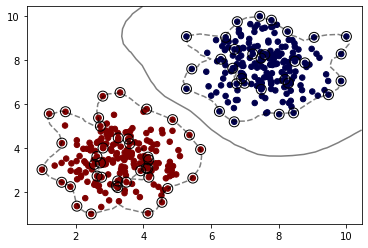

In [26]:
model = SVC(kernel='rbf',C=1, gamma=0.9)
model.fit(X, y)
plot_svm_boundary(model, X, y)
# - As gamma increases the model starts to pick more and more noise


C:\Users\Shreyash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


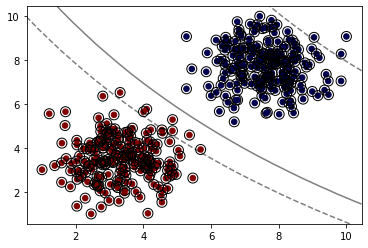

In [27]:
model = SVC(kernel='sigmoid')
model.fit(X, y)
plot_svm_boundary(model, X, y)

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
svm = SVC()
param_grid = {'C' : [0.01, 0.1, 1], 'kernel' : ['linear', 'rbf']}

In [30]:
grid = GridSearchCV(svm, param_grid)

In [31]:
grid.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [32]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}